In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
## Data Preprocessing
# Training Image Preprocessing
# Training Image Preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    directory='train',             # Replace with the actual path to your training images
    labels="inferred",             # Automatically infers labels from directory names
    label_mode="categorical",      # Outputs labels as one-hot encoded vectors
    class_names=None,              # Leave as None to infer class names from directory structure
    color_mode="rgb",              # Use RGB (3-channel images)
    batch_size=64,                 # Number of images per batch
    image_size=(32, 32),           # Resize all images to 32x32
    shuffle=True,                  # Shuffle the dataset
    seed=42,                       # Ensures reproducibility when shuffling
    interpolation="bilinear",      # Interpolation method when resizing images
    follow_links=False,            # Whether to follow symlinks in the directory
    crop_to_aspect_ratio=False     # Do not crop images
)

Found 70295 files belonging to 38 classes.


In [4]:
## Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    directory='valid',             # Replace with the actual path to your validation images
    labels="inferred",             # Automatically infers labels from directory names
    label_mode="categorical",      # Outputs labels as one-hot encoded vectors
    class_names=None,              # Leave as None to infer class names from directory structure
    color_mode="rgb",              # Use RGB (3-channel images)
    batch_size=64,                 # Number of images per batch
    image_size=(32, 32),           # Resize all images to 32x32
    shuffle=True,                  # Shuffle the dataset
    seed=42,                       # Ensures reproducibility when shuffling
    interpolation="bilinear",      # Interpolation method when resizing images
    follow_links=False,            # Whether to follow symlinks in the directory
    crop_to_aspect_ratio=False     # Do not crop images
)

Found 17572 files belonging to 38 classes.


In [5]:
## Test 
training_set 

<BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
## Test 
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[255.   255.   255.  ]
   [255.   255.   255.  ]
   [254.   252.   254.5 ]
   ...
   [253.25 245.75 252.75]
   [251.5  244.5  250.75]
   [229.   218.   227.25]]

  [[254.   254.   254.  ]
   [255.   255.   255.  ]
   [255.   253.5  255.  ]
   ...
   [253.   244.   252.  ]
   [249.25 239.   247.75]
   [255.   244.25 253.5 ]]

  [[255.   255.   255.  ]
   [254.5  254.5  254.5 ]
   [252.5  252.5  252.5 ]
   ...
   [242.   226.   237.5 ]
   [250.   247.5  251.  ]
   [241.5  235.75 241.25]]

  ...

  [[255.   253.5  255.  ]
   [254.5  252.5  255.  ]
   [253.75 252.   254.25]
   ...
   [254.75 254.75 254.75]
   [254.75 254.75 254.75]
   [255.   255.   255.  ]]

  [[253.   251.   252.  ]
   [252.25 250.25 251.25]
   [254.25 254.25 254.25]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   254.   255.  ]
   [255.   253.   254.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [249.   249.   249.  ]
   [255.   255.   25

In [7]:
## To Avoid Overshooting
## 1. Choose small learning rate default 0.001 we are taking 0.0001.
## 2. They say be chance of Underfitting, so increase number of neuron.
## 3. Add more Convulution layer to extarct more more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature.


In [8]:
## Building Model
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()

In [10]:
## Building 1st Phase (Convolution Layers)
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[32,32,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[32,32,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[32,32,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
# First convolutional layer with input shape
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', input_shape=[32, 32, 3]))

# Second convolutional layer with padding to preserve spatial dimensions
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))

# Pooling layer
model.add(MaxPool2D(pool_size=2, strides=2))

In [14]:
# First convolutional layer
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', input_shape=[32, 32, 3]))

# Second convolutional layer
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))

# Pooling layer
model.add(MaxPool2D(pool_size=2, strides=2, padding='same'))

In [15]:
model.add(Dropout(0.25))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(units=1500,activation='relu'))

In [18]:
model.add(Dropout(0.40))

In [19]:
## Output Layer
model.add(Dense(units=38,activation='softmax'))

In [20]:
## Compiling Model
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [22]:
## Model Tarining
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
1099/1099 [==============================] - 83s 66ms/step - loss: 2.1360 - accuracy: 0.3690 - val_loss: 1.1456 - val_accuracy: 0.6436
Epoch 2/10
1099/1099 [==============================] - 63s 57ms/step - loss: 1.0644 - accuracy: 0.6672 - val_loss: 0.7708 - val_accuracy: 0.7567
Epoch 3/10
1099/1099 [==============================] - 63s 57ms/step - loss: 0.7436 - accuracy: 0.7663 - val_loss: 0.6407 - val_accuracy: 0.7971
Epoch 4/10
1099/1099 [==============================] - 62s 56ms/step - loss: 0.5609 - accuracy: 0.8213 - val_loss: 0.6042 - val_accuracy: 0.8099
Epoch 5/10
1099/1099 [==============================] - 63s 57ms/step - loss: 0.4416 - accuracy: 0.8590 - val_loss: 0.4289 - val_accuracy: 0.8655
Epoch 6/10
1099/1099 [==============================] - 59s 53ms/step - loss: 0.3626 - accuracy: 0.8829 - val_loss: 0.3939 - val_accuracy: 0.8774
Epoch 7/10
1099/1099 [==============================] - 64s 58ms/step - loss: 0.2878 - accuracy: 0.9061 - val_loss: 0.3388 -

In [23]:
## Model Evaluation
## Model Evaluation on Training Set
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)
print('Training loss:', train_loss)

1099/1099 [==============================] - 42s 38ms/step - loss: 0.1168 - accuracy: 0.9607
Training accuracy: 0.960665762424469
Training loss: 0.11675607413053513


In [24]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)
print('Validation loss:', val_loss)

275/275 [==============================] - 10s 35ms/step - loss: 0.2904 - accuracy: 0.9126
Validation accuracy: 0.9126451015472412
Validation loss: 0.2903761565685272


In [25]:
## Saving Model
# Saving the trained model 
model.save("trained_plant_disease_model_save.keras")

# Confirmation message
print("Model has been saved successfully as 'trained_plant_disease_model_save.keras'")

Model has been saved successfully as 'trained_plant_disease_model_save.keras'


In [26]:
training_history.history #Return Dictionary of history

{'loss': [2.1359879970550537,
  1.064361810684204,
  0.7436249852180481,
  0.5608999729156494,
  0.44155752658843994,
  0.3626479506492615,
  0.2877674698829651,
  0.24313393235206604,
  0.20229080319404602,
  0.17451921105384827],
 'accuracy': [0.3689593970775604,
  0.6671740412712097,
  0.7662565112113953,
  0.821295976638794,
  0.8589658141136169,
  0.8829361796379089,
  0.90608149766922,
  0.9199231863021851,
  0.933978259563446,
  0.9423714280128479],
 'val_loss': [1.145644187927246,
  0.7707506418228149,
  0.6407147645950317,
  0.6042379140853882,
  0.42890453338623047,
  0.39390525221824646,
  0.33876940608024597,
  0.331705778837204,
  0.28280413150787354,
  0.29037612676620483],
 'val_accuracy': [0.6436375975608826,
  0.7567152380943298,
  0.7970635294914246,
  0.8098679780960083,
  0.8654677867889404,
  0.8774186372756958,
  0.894092857837677,
  0.8942636251449585,
  0.9116207361221313,
  0.9126451015472412]}

In [27]:
# Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [28]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


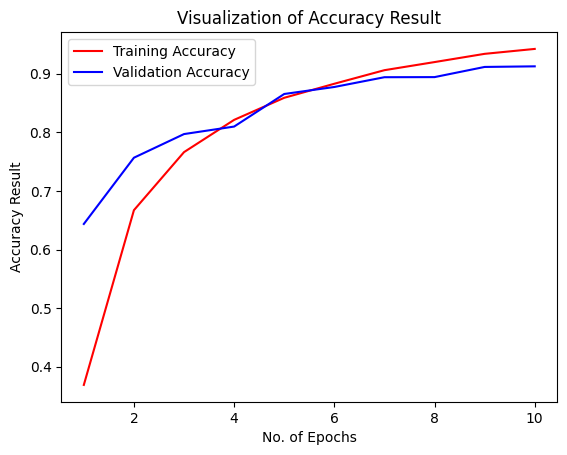

In [29]:
## Accuracy Visualization
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

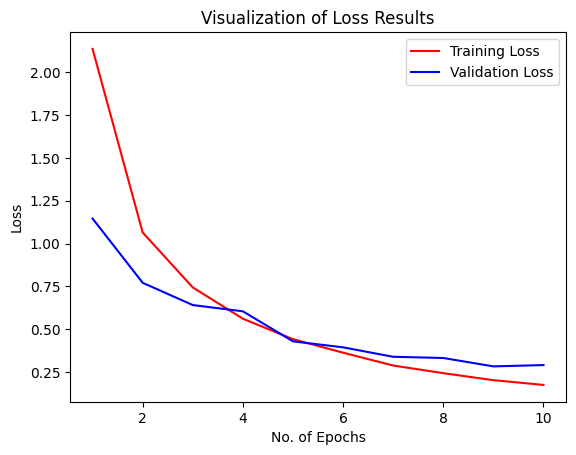

In [30]:
## Loss Visualization
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Visualization of Loss Results')
plt.legend()
plt.show()

In [31]:
## Some other metrics for model evaluation
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [32]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(32, 32),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [33]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 140s 8ms/step


In [34]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [35]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [36]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [38]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [39]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.90      0.91      0.91       504
                                 Apple___Black_rot       0.94      0.89      0.91       497
                          Apple___Cedar_apple_rust       0.97      0.86      0.91       440
                                   Apple___healthy       0.93      0.88      0.90       502
                               Blueberry___healthy       0.87      0.93      0.90       454
          Cherry_(including_sour)___Powdery_mildew       0.94      0.94      0.94       421
                 Cherry_(including_sour)___healthy       0.93      0.95      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.82      0.87       410
                       Corn_(maize)___Common_rust_       0.97      0.97      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.95      0.

In [40]:
## Confusion Matrix
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[461,   6,   1, ...,   0,   0,   0],
       [  4, 443,   0, ...,   0,   0,   0],
       [  1,   0, 378, ...,   2,   3,   6],
       ...,
       [  0,   0,   0, ..., 465,   0,   0],
       [  0,   0,   0, ...,   0, 437,   0],
       [  0,   0,   0, ...,   0,   0, 465]], dtype=int64)

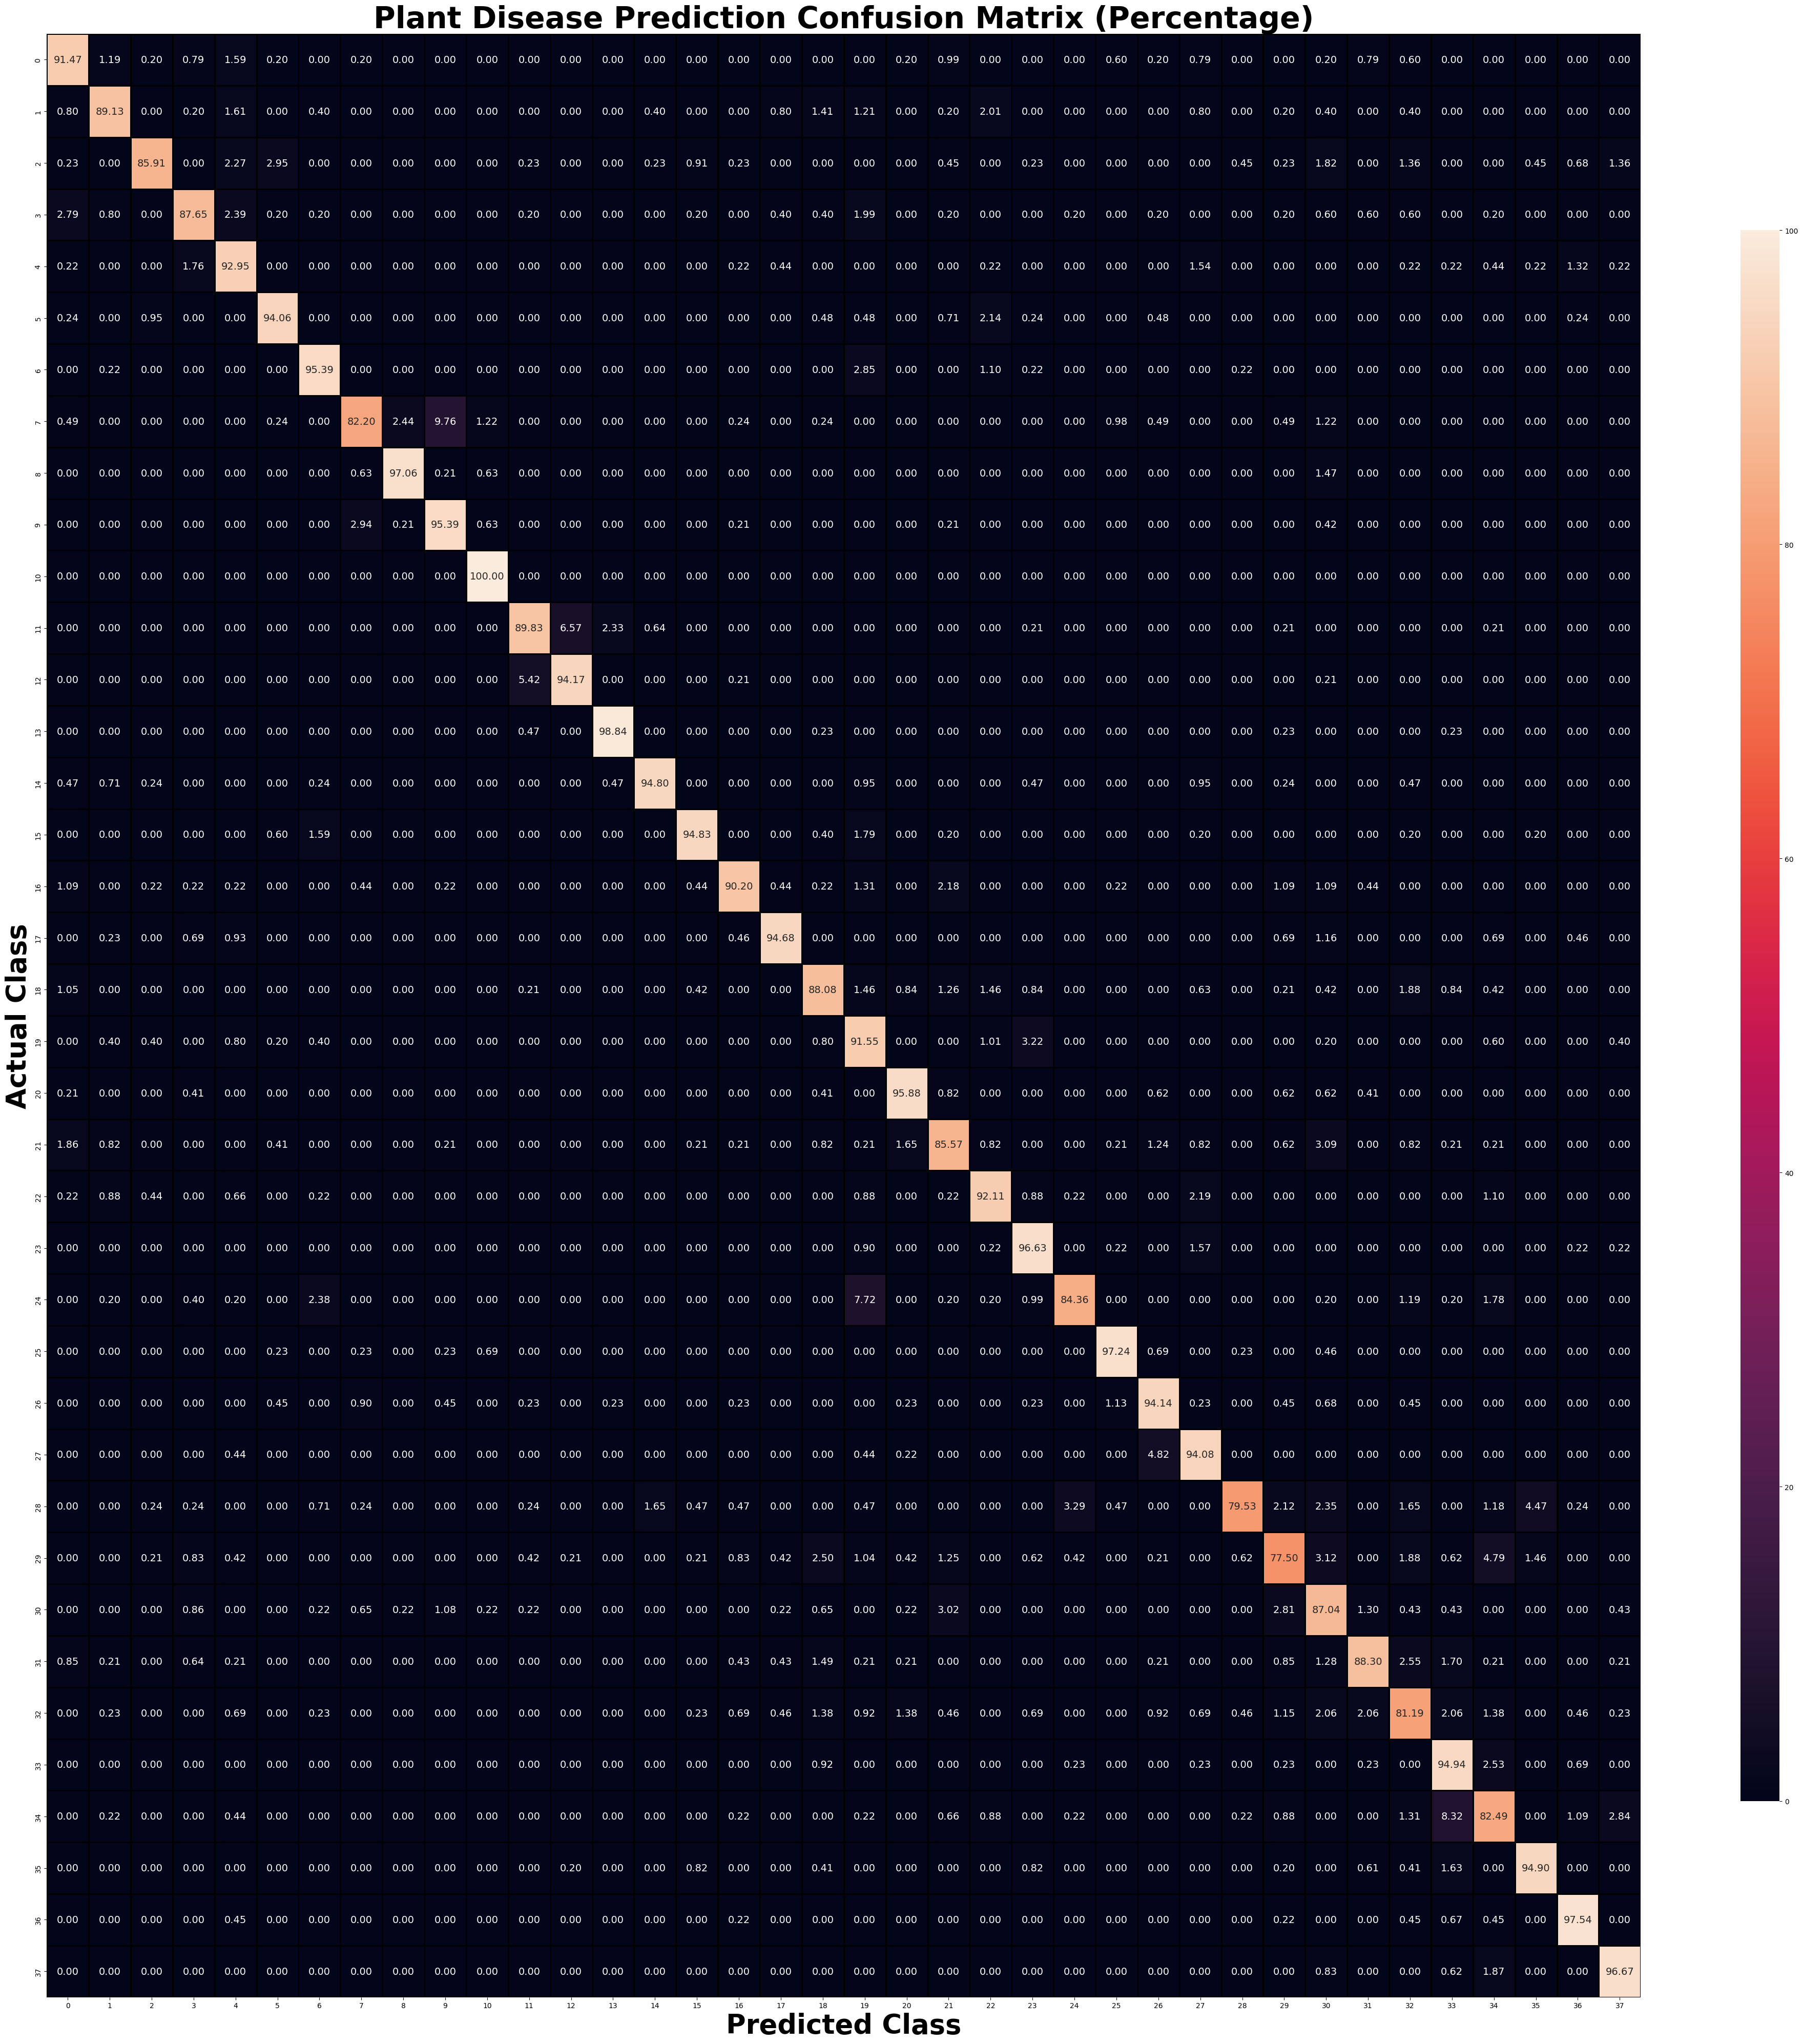

In [41]:
## Confusion Matrix Visualization
cm = np.array(cm)  # Ensure cm is a NumPy array
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Normalize by row

plt.figure(figsize=(40, 40))  # Adjust figure size
sns.heatmap(cm_percentage, 
            annot=True,                  # Show numbers on the heatmap
            annot_kws={"size": 14},      # Adjust size of annotations
            fmt='.2f',                   # Annotation format for percentages
            linewidths=1,                # Add lines between cells for better clarity
            linecolor='black',           # Set line color
            cbar_kws={'shrink': 0.8, 'aspect': 40})  # Customize color bar

# Labels and Title
plt.xlabel('Predicted Class', fontsize=38, weight='bold')
plt.ylabel('Actual Class', fontsize=38, weight='bold')
plt.title('Plant Disease Prediction Confusion Matrix (Percentage)', fontsize=42, weight='bold')

plt.tight_layout()  # Adjust layout for better visibility
plt.show() 